### Assignment 2. Text Modeling

In this assignment, we ask you to create a classifier for detecting spam. Please populate this Jupyter notebook with your code and embedded results (outputs, figures, etc) and submit it on Canvas as a zip file.  <B

Useful libraries for this assignment: <br>
(1) sklearn
(2) nltk
(3) gensim

### Q1 (76 points)
You have been provided a spam dataset (SPAM.csv). Each line in the dataset corresponds to one message and has a label of either "ham" or "spam". In this assignment, you are experimenting with different features and models to create the best spam detector possible.  

Load the data into a dataframe. Divide the data into a random train/test set with the ratio 85/15. Finally, use sklearn to run the following experiments.

**(A)[10 points]** Train and evaluate the following models:

(1) Logistic Regression (LR)
<br>
(2) Random Forest (RF)
<br>


**(B)[24 points]** and the combination of all following preprocessing (total of 8 combinations):
<br>
(1) with and without lowercasing <br> (2) with and without stopword removal (3) with and without lemmatization <br>

**(C)[24 points]** and the following lexical features (total of 6 combinations): 
<br>
(1) unigrams <br>(2) unigrams and bigrams <br>(3) unigrams, bigrams and trigrams <br>
(4) tfidf unigrams <br>(5) tfidf  unigrams and bigrams <br>(6) tfidf unigrams, bigrams and trigrams  <br>

So that's 2 model types x 8 possible prepreocessing x 6 possible features = 96 models <br>

**(D)[10 points]** Create a dataframe where each row is one of the models and 15 columns. The first 9 columns should be boolean and capture if the model used the following: <br>

(1) lowercased: 1 / 0 <br>
(2) stopwords_removed: 1 / 0 <br>
(3) lemmatized: 1 / 0 <br>
(4) unigrams : 1 / 0 <br>
(5) bigrams :  1 / 0 <br>
(6) trigrams :  1 / 0 <br>
(7) tfidf unigrams :  1 / 0 <br>
(8) tfidf bigrams :  1 / 0 <br>
(9) tfidf trigrams :  1 / 0 <br>

The last 6 columns should show the default f1 (default parameters), weighted f1, and accuracy of the models on the **train** and **test** sets: <br>

(10) f1_train <br>
(11) weighted_f1_train <br>
(12) accuracy_train <br>
(13) f1_test <br>
(14) weighted_f1_test <br>
(15) accuracy_test <br>

**(E)[4 points]** <br>
Which model has the best weighted f1 according to the train set? <br>
Which model has the best weighted f1 according to the test set? <br>

**(F)[4 points]** <br>
Show the confusion matrix for the best-performing model on the test set. Explain what each element of the matrix means. <br>


HINT 1: You should convert the "spam" category to 1 and the "ham" category to 0, sklearn models can only work with numbers. <br>

HINT 2: You should make the whole thing systematically using good coding convetion instead of copy and pasting the models! I have created a partial skeleton template for Q1 below to guide you with this. You do NOT have to use this. This is just for your benefit. I have not included templates for the other questions.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# load data into dataframe
data = pd.read_csv('SPAM.csv')

# convert spam category to 1 and ham category to 0
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivoryang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ivoryang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [2]:
# divide the data into a random train/test set with the ratio 85/15
X = data['Message']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 27)


In [3]:
def preprocess(tokenized_text,lowercase=False, remove_stopwords=False,lemmatize=False):
    
    # initialize an empty list to store the preprocessed text
    cleaned_tokenized_text = []
    
    for token in tokenized_text:
        # lowercase
        if lowercase:
            token = token.lower()
            
        # remove stopwords
        if remove_stopwords:
            if token not in stopwords.words('english'):
                cleaned_tokenized_text.append(token)
        else:
            cleaned_tokenized_text.append(token)
        
        # lemmatize
        if lemmatize:
            lemmatizer = WordNetLemmatizer()
            token = lemmatizer.lemmatize(token)

        
    return cleaned_tokenized_text


In [4]:
def extract_features(cleaned_tokenized_text_train, cleaned_tokenized_text_test, tfidf_option, ngram_range):
    
    if tfidf_option:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, lowercase=False)
        
    else:
        vectorizer = CountVectorizer(ngram_range=ngram_range, lowercase=False)

    # Transform the list of tokenized words directly
    features_train = vectorizer.fit_transform(cleaned_tokenized_text_train)
    features_test = vectorizer.transform(cleaned_tokenized_text_test)
    
    return features_train, features_test


In [5]:
def train_model(model_type,train_features, train_labels):
    
    if model_type == "LogisticRegression":
        trained_model = LogisticRegression(random_state=27)
        
    elif model_type == "RandomForest":
        trained_model = RandomForestClassifier(random_state=27)
        
    else:
        raise ValueError("Unsupported model type")

    trained_model.fit(train_features, train_labels)
    
    return trained_model


In [6]:
def evaluate_model(trained_model,metric,eval_features,eval_labels):
    
    if metric == "accuracy":
        predictions = trained_model.predict(eval_features)
        model_eval = accuracy_score(eval_labels, predictions)
        
    elif metric == "weighted_f1":
        predictions = trained_model.predict(eval_features)
        model_eval = f1_score(eval_labels, predictions, average='weighted')
        
    else:
        raise ValueError("Unsupported evaluation metric")

    return model_eval


In [7]:
def run_experiments():
    results = []
    preprocessing_options = [False, True]
    model_option = ['LogisticRegression', 'RandomForest']
    ngram_ranges = [(1, 1), (1, 2), (1, 3)]
    
    for model_type in model_option:
        for lowercase in preprocessing_options:
            for remove_stopwords in preprocessing_options:
                for lemmatize in preprocessing_options:
                    for ngram_range in ngram_ranges:
                        for tfidf_option in preprocessing_options:
                            cleaned_train_data = X_train.apply(lambda x: ' '.join(preprocess(word_tokenize(x), lowercase, remove_stopwords, lemmatize)))
                            cleaned_test_data = X_test.apply(
                                lambda x: ' '.join(preprocess(word_tokenize(x), lowercase, remove_stopwords, lemmatize))
                            )
                            train_features, test_features = extract_features(cleaned_train_data, cleaned_test_data, tfidf_option, ngram_range)
                            model = train_model(model_type, train_features, y_train)
                            f1_train = evaluate_model(model, 'weighted_f1', train_features, y_train)
                            f1_test = evaluate_model(model, 'weighted_f1', test_features, y_test)
                            result_row = {
                                'model_type': model_type,
                                'lowercased': lowercase,
                                'stopwords_removed': remove_stopwords,
                                'lemmatized': lemmatize,
                                'unigrams': ngram_range == (1, 1),
                                'bigrams': ngram_range == (1, 2),
                                'trigrams': ngram_range == (1, 3),
                                'tfidf_unigrams': tfidf_option,
                                'tfidf_bigrams': tfidf_option,
                                'tfidf_trigrams': tfidf_option,
                                'f1_train': f1_train,
                                'weighted_f1_train': f1_train,  
                                'accuracy_train': f1_train,
                                'f1_test': f1_test,
                                'weighted_f1_test': f1_test,    
                                'accuracy_test': f1_test        
                            }
                            results.append(result_row)

    results_df = pd.DataFrame(results)
    return results_df

In [8]:
results_df = run_experiments()
print(results_df)

            model_type  lowercased  stopwords_removed  lemmatized  unigrams  \
0   LogisticRegression       False              False       False      True   
1   LogisticRegression       False              False       False      True   
2   LogisticRegression       False              False       False     False   
3   LogisticRegression       False              False       False     False   
4   LogisticRegression       False              False       False     False   
..                 ...         ...                ...         ...       ...   
91        RandomForest        True               True        True      True   
92        RandomForest        True               True        True     False   
93        RandomForest        True               True        True     False   
94        RandomForest        True               True        True     False   
95        RandomForest        True               True        True     False   

    bigrams  trigrams  tfidf_unigrams  tfidf_bigram

In [9]:
results_df

,model_type,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test
0,LogisticRegression,False,False,False,True,False,False,False,False,False,0.997881,0.997881,0.997881,0.977923,0.977923,0.977923
1,LogisticRegression,False,False,False,True,False,False,True,True,True,0.968533,0.968533,0.968533,0.948729,0.948729,0.948729
2,LogisticRegression,False,False,False,False,True,False,False,False,False,0.999366,0.999366,0.999366,0.975388,0.975388,0.975388
3,LogisticRegression,False,False,False,False,True,False,True,True,True,0.951599,0.951599,0.951599,0.930159,0.930159,0.930159
4,LogisticRegression,False,False,False,False,False,True,False,False,False,0.999366,0.999366,0.999366,0.972834,0.972834,0.972834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,RandomForest,True,True,True,True,False,False,True,True,True,1.000000,1.000000,1.000000,0.962286,0.962286,0.962286
92,RandomForest,True,True,True,False,True,False,False,False,False,1.000000,1.000000,1.000000,0.959620,0.959620,0.959620
93,RandomForest,True,True,True,False,True,False,True,True,True,1.000000,1.000000,1.000000,0.959620,0.959620,0.959620
94,RandomForest,True,True,True,False,False,True,False,False,False,1.000000,1.000000,1.000000,0.951487,0.951487,0.951487


In [10]:
# (E) Which model has the best weighted f1 according to the train set?
best_model_train = results_df.loc[results_df.groupby('model_type')['weighted_f1_train'].idxmax()]

# Print the results
print("Best Model for Weighted F1 on Train Set:")
print(best_model_train[['model_type', 'weighted_f1_train']])


Best Model for Weighted F1 on Train Set:
            model_type  weighted_f1_train
2   LogisticRegression           0.999366
48        RandomForest           1.000000


**Random Forest** has the best weighted f1 according to the **train set**.

In [11]:
# (E) Which model has the best weighted f1 according to the test set?
best_model_test = results_df.loc[results_df.groupby('model_type')['weighted_f1_test'].idxmax()]

print("\nBest Model for Weighted F1 on Test Set:")
print(best_model_test[['model_type', 'weighted_f1_test']])


Best Model for Weighted F1 on Test Set:
            model_type  weighted_f1_test
0   LogisticRegression          0.977923
48        RandomForest          0.968857


**Logistic Regression** has the best weighted f1 according to the **test set**.

In [12]:
best_model_q1 = results_df.loc[0]
print(results_df.loc[0])

model_type           LogisticRegression
lowercased                        False
stopwords_removed                 False
lemmatized                        False
unigrams                           True
bigrams                           False
trigrams                          False
tfidf_unigrams                    False
tfidf_bigrams                     False
tfidf_trigrams                    False
f1_train                       0.997881
weighted_f1_train              0.997881
accuracy_train                 0.997881
f1_test                        0.977923
weighted_f1_test               0.977923
accuracy_test                  0.977923
Name: 0, dtype: object


In [13]:
# (F)[4 points]
# Show the confusion matrix for the best-performing model on the test set

from sklearn.metrics import confusion_matrix

cleaned_train_text = preprocess(X_train, lowercase=False, remove_stopwords=False, lemmatize=False)
cleaned_test_text = preprocess(X_test, lowercase=False, remove_stopwords=False, lemmatize=False)
train_features, test_features = extract_features(cleaned_train_text, cleaned_test_text, tfidf_option=False, ngram_range=(1,1))

model = train_model('LogisticRegression', train_features, y_train)
y_pred = model.predict(test_features)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[698,   1],
       [ 17, 120]])

Explain what each element of the matrix means:

- **Top Left:** True Positives (TP): Spam messages that are correctly predicted as spam
- **Top Right:** False Negatives (FN): Spam messages that are incorrectly predicted as not spam
- **Bottom Left:** False Positives (FP): Non-spam messages that are incorrectly predicted as spam
- **Bottom Right:** True Negatives (TN): Non-spam messages that are correctly predicted as not spam


### Q2 (56 points)
**(A)[40 points]** Repeat the experiment for the best-performing combination of model type, preprocessing, and lexical features above, but this time limit the analysis to all the combinations of the parts-of-speeches below (total of 8 combinations):<br>

(1) Adjectives <br>
(2) Nouns  <br>
(3) Verbs  <br>

What this means is that after tokenization and before preprocessing, you remove all words that do not have the part of speech you are looking at. E.g., for the combination Adjectives & Nouns, all words that are not a noun or adjective should be removed. <br>

So that's 8 new models. <br>

**(B)[10 points]** Create a new dataframe where each row is one of the models. The dataframe should have 3 boolean columns capturing which parts-of-speech were used: <br>

(1) adjectives : 1 / 0 <br>
(2) nouns : 1 / 0 <br>
(3) verbs : 1 / 0 <br>
 
and 3 columns showing the default f1 (default parameters), weighted f1, and accuracy of the models on the **test** set only: <br>

(4) f1_test <br>
(5) weighted_f1_test <br>
(6) accuracy_test <br>

**(C)[6 points]** <br>
Which model has the best weighted f1 according to the test set? <br>
Show the confusion matrix for the best-performing model on the test set. <br>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression

nltk.download('averaged_perceptron_tagger')

# Load data into a DataFrame
data = pd.read_csv('SPAM.csv')

# Convert 'spam' category to 1 and 'ham' category to 0
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.15, random_state=27)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ivoryang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def pos_limit(tokenized_text, inc_adj=False, inc_noun=False, inc_verb=False):
    # initialize an empty list to store the preprocessed text
    cleaned_tokenized_text = []

    # filter based on POS tags
    if not inc_adj and not inc_noun and not inc_verb:
        tagged_tokens = pos_tag(tokenized_text)
        cleaned_tokenized_text = [token for token, pos in tagged_tokens if not pos.startswith('JJ') and not pos.startswith('NN') and not pos.startswith('VB')]
    else:
        allowed_pos = []
        if inc_adj:
            # Used example usage commented out below to check if VB would cover VBZ as well, and it does
            # So only included the first two characters like JJ, NN and VB
            # JJ, JJR, JJS 
            allowed_pos.append('JJ')
        if inc_noun:
            # NN, NNS, NNP, NNPS
            allowed_pos.append('NN')
        if inc_verb:
            # VB, VBD, VBN, VBP, VBZ
            allowed_pos.append('VB')

        tagged_tokens = pos_tag(tokenized_text)
        cleaned_tokenized_text = [token for token, pos in tagged_tokens if pos.startswith(tuple(allowed_pos))]

    return cleaned_tokenized_text

# Example usage:
# tokenized_text = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
# print(pos_tag(tokenized_text))
# preprocessed_text = pos_limit(tokenized_text, inc_adj=False, inc_noun=False, inc_verb=False)

# print(preprocessed_text)


In [16]:
def run_pos_experiments():
    results_pos = []

    pos_combinations = [
        {'adjectives': True, 'nouns': False, 'verbs': False},  # Adjectives only
        {'adjectives': False, 'nouns': True, 'verbs': False},  # Nouns only
        {'adjectives': False, 'nouns': False, 'verbs': True},  # Verbs only
        {'adjectives': True, 'nouns': True, 'verbs': False},   # Adjectives & Nouns
        {'adjectives': True, 'nouns': False, 'verbs': True},   # Adjectives & Verbs
        {'adjectives': False, 'nouns': True, 'verbs': True},   # Nouns & Verbs
        {'adjectives': True, 'nouns': True, 'verbs': True},    # Adjectives, Nouns & Verbs
        {'adjectives': False, 'nouns': False, 'verbs': False}  # Baseline without filtering
    ]

    for pos_config in pos_combinations:
        train_features_pos = [' '.join(pos_limit(word_tokenize(text), inc_adj=pos_config['adjectives'], inc_noun=pos_config['nouns'], inc_verb=pos_config['verbs'])) for text in X_train]
        test_features_pos = [' '.join(pos_limit(word_tokenize(text), inc_adj=pos_config['adjectives'], inc_noun=pos_config['nouns'], inc_verb=pos_config['verbs'])) for text in X_test]

        # Check if filtered text is empty
        if not any(train_features_pos) or not any(test_features_pos):
            continue

        vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=False)
        features_train = vectorizer.fit_transform(train_features_pos)
        features_test = vectorizer.transform(test_features_pos)

        model_pos = LogisticRegression(random_state=27)
        model_pos.fit(features_train, y_train)
        y_pred_pos = model_pos.predict(features_test)

        f1_test_pos = f1_score(y_test, y_pred_pos)
        weighted_f1_test_pos = f1_score(y_test, y_pred_pos, average='weighted')
        accuracy_test_pos = accuracy_score(y_test, y_pred_pos)

        result_row_pos = {
            'adjectives': pos_config['adjectives'],
            'nouns': pos_config['nouns'],
            'verbs': pos_config['verbs'],
            'f1_test': f1_test_pos,
            'weighted_f1_test': weighted_f1_test_pos,
            'accuracy_test': accuracy_test_pos
        }
        results_pos.append(result_row_pos)

    results_pos_df = pd.DataFrame(results_pos)
    return results_pos_df   

In [17]:
results_pos_df = run_pos_experiments()
print(results_pos_df)

   adjectives  nouns  verbs   f1_test  weighted_f1_test  accuracy_test
0        True  False  False  0.574359          0.883262       0.900718
1       False   True  False  0.864198          0.958437       0.960526
2       False  False   True  0.640777          0.898927       0.911483
3        True   True  False  0.895161          0.967553       0.968900
4        True  False   True  0.752212          0.927013       0.933014
5       False   True   True  0.891566          0.966366       0.967703
6        True   True   True  0.916996          0.974024       0.974880
7       False  False  False  0.788136          0.936168       0.940191


In [18]:
results_pos_df

,adjectives,nouns,verbs,f1_test,weighted_f1_test,accuracy_test
0,True,False,False,0.574359,0.883262,0.900718
1,False,True,False,0.864198,0.958437,0.960526
2,False,False,True,0.640777,0.898927,0.911483
3,True,True,False,0.895161,0.967553,0.968900
4,True,False,True,0.752212,0.927013,0.933014
5,False,True,True,0.891566,0.966366,0.967703
6,True,True,True,0.916996,0.974024,0.974880
7,False,False,False,0.788136,0.936168,0.940191


In [19]:
# C: Which model has the best weighted f1 according to the test set?

# Find the model with the best weighted f1
best_model_q2 = results_pos_df.loc[results_pos_df['weighted_f1_test'].idxmax()]

# Print the information about the best model
print("\nBest Model:")
print(best_model_q2)


Best Model:
adjectives              True
nouns                   True
verbs                   True
f1_test             0.916996
weighted_f1_test    0.974024
accuracy_test        0.97488
Name: 6, dtype: object


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize

# Best model configuration
best_model_config = {'adjectives': True, 'nouns': True, 'verbs': True}

# Preprocess the test data with the best model's configuration
X_test_processed_pos = [' '.join(pos_limit(word_tokenize(text), inc_adj=best_model_config['adjectives'], inc_noun=best_model_config['nouns'], inc_verb=best_model_config['verbs'])) for text in X_test]

# Vectorize the training features
vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=False)
features_train = vectorizer.fit_transform(X_train)

# Vectorize the test features using the vocabulary from the training data
features_test = vectorizer.transform(X_test_processed_pos)

# Train a logistic regression model on the training features
model_pos = LogisticRegression(random_state=27)
model_pos.fit(features_train, y_train)

# Predict using the trained model
y_pred_test = model_pos.predict(features_test)

# Show the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[699   0]
 [ 42  95]]


### Q3 (68 points)

**(A)[32 points]** Repeat the experiment for the best-performing model type from Q1 (i.e., LR or RF) using the following features (no preprocessing is required): <br>
(1) Word2Vec features from GoogleNews (limit vocabulary to 40000 words) <br>
(2) Features from a new Word2Vec model trained on the **train** set of your dataset. Use the following hyperparameters: window=5,vector_size=100 ,min_count=5 <br>

You can average the semantic embeddings for the words in a document to create a single semantic vector for the document. You can ignore words that are not present in your Word2Vec model. <br>

**(B)[10 points]** Use weighted f1 on the test set to pick the best semantic features from the two options above and combine them with the best-performing features from Q2 to train a new model. <br>

**(C)[20 points]** Finally, create a new dataframe where each row is one of the following models: <br>
(1) Best-performing model using lexical features only (Q1).  <br>
(2) Best-performing model using lexical features on different parts-of-speech (Q2).  <br>
(3) Best-performing model from using semantic features only (Q3-A).  <br>
(4) The final model from Q3-B that combines the best semantic and lexical features.  <br>

<br>
The dataframe should have boolean columns capturing which (if any) preprocessing techniques were used: <br>
<br>

(1) lowercased: 1 / 0 <br>
(2) stopwords_removed: 1 / 0 <br>
(3) lemmatized: 1 / 0 <br>

<br>
which (if any) parts-of-speech were used: <br>
<br>

(4) adjectives : 1 / 0 <br>
(5) nouns : 1 / 0 <br>
(6) verbs : 1 / 0 <br>
(7) all: 1 / 0  (this is for the best-performing Q1 model that uses all parts-of-speech)<br>


<br>
which (if any) lexical features were used: <br>
<br>

(8) unigrams : 1 / 0 <br>
(9) bigrams :  1 / 0 <br>
(10) trigrams :  1 / 0 <br>
(11) tfidf unigrams :  1 / 0 <br>
(12) tfidf bigrams :  1 / 0 <br>
(13) tfidf trigrams :  1 / 0 <br>


<br>
which (if any) semantic features were used: <br>
<br>

(14) w2v_GoogleNews : 1 / 0 <br>
(15) w2v_Span=m : 1 / 0 <br>

 
and 3 columns showing the default f1 (default parameters), weighted f1, and accuracy of the four models on the **test** set only: <br>

(16) f1_test <br>
(17) weighted_f1_test <br>
(18) accuracy_test <br>

**(D)[6 points]**
Which model has the best weighted f1 according to the test set? <br> 
Show the confusion matrix for the best-performing model on the test set. <br>

In [21]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
from sklearn.preprocessing import scale

# Load the GoogleNews Word2Vec model
google_w2v_model_path = '/Users/ivoryang/Downloads/GoogleNews-vectors-negative300.bin'
google_w2v_model = KeyedVectors.load_word2vec_format(google_w2v_model_path, binary=True, limit=40000)


In [22]:
# Tokenize text in training set
train_data, test_data = train_test_split(data, test_size=0.15, random_state = 27)

# Extract raw text and labels
X_train_raw = train_data['Message']
y_train = train_data['Category']
X_test_raw = test_data['Message']
y_test = test_data['Category']

train_texts = [word_tokenize(text) for text in X_train_raw]

# Train a new Word2Vec model on the training set
my_model = Word2Vec(sentences=train_texts, vector_size=100, window=5, min_count=5).wv

In [23]:
models_w2v=[{'name':'w2v_GoogleNews', 'model': google_w2v_model}, {'name':'w2v_Span=m', 'model':my_model}]

In [24]:
def extract_w2v_features(text, w2vmodel):
    tokens = word_tokenize(text)
    vectors = [w2vmodel[word] for word in tokens if w2vmodel.has_index_for(word)]
    
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2vmodel.vector_size)


In [25]:
# A

import numpy as np

metrics_list = []

i = 1
total_iterations = len(models_w2v)
    
for wv in models_w2v:
    wv_name = wv['name']
    word2vec = wv['model']

    # Preprocess the training data
    X_train_processed = [extract_w2v_features(text, word2vec) for text in X_train_raw]

    # Convert the list of feature vectors to a numpy array
    X_train_array = np.array(X_train_processed)

    # Create a logistic regression model
    logreg_model = LogisticRegression(random_state=27)

    # Fit the model on the training data
    logreg_model.fit(X_train_array, y_train)

    # Preprocess the test data
    X_test_processed = [extract_w2v_features(text, word2vec) for text in X_test_raw]

    # Convert the list of feature vectors to a numpy array
    X_test_array = np.array(X_test_processed)

    # Predict using the test data
    y_pred = logreg_model.predict(X_test_array)

    # Calculate and print evaluation metrics
    f1_test = f1_score(y_test, y_pred)
    weighted_f1_test = f1_score(y_test, y_pred, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred)
    
    metrics_list.append({
        'Model': wv_name,
        'f1_test': f1_test,
        'weighted_f1_test': weighted_f1_test,
        'accuracy_test': accuracy_test
    })
    
    # Create a DataFrame from the list of metrics
    metrics_df = pd.DataFrame(metrics_list)
    print(metrics_df)

            Model   f1_test  weighted_f1_test  accuracy_test
0  w2v_GoogleNews  0.854902           0.95439       0.955742
            Model   f1_test  weighted_f1_test  accuracy_test
0  w2v_GoogleNews  0.854902          0.954390       0.955742
1      w2v_Span=m  0.142857          0.786829       0.842105


In [26]:
metrics_df

,Model,f1_test,weighted_f1_test,accuracy_test
0,w2v_GoogleNews,0.854902,0.954390,0.955742
1,w2v_Span=m,0.142857,0.786829,0.842105


In [27]:
# Sort the DataFrame by 'Weighted F1 Score on Test Data' column in descending order
sorted_df = metrics_df.sort_values(by='weighted_f1_test', ascending=False)

# Select the top-performing model (first row)
best_model_q3a = sorted_df.iloc[0]

# Display the top-performing model
print("Top Performing Model:")
print(best_model_q3a)

Top Performing Model:
Model               w2v_GoogleNews
f1_test                   0.854902
weighted_f1_test           0.95439
accuracy_test             0.955742
Name: 0, dtype: object


In [28]:
# B

# From Q2

combined_metrics_list = []

best_model_config = {'adjectives': True, 'nouns': True, 'verbs': True}

# Extract the relevant configuration values
inc_adj = best_model_config['adjectives']
inc_noun = best_model_config['nouns']
inc_verb = best_model_config['verbs']

# Preprocess the training data with the Q2 model's configuration
X_train_processed_pos = [' '.join(pos_limit(word_tokenize(text), inc_adj=inc_adj, inc_noun=inc_noun, inc_verb=inc_verb)) for text in X_train_raw]
# Preprocess the test data with the Q2 model's configuration
X_test_processed_pos = [' '.join(pos_limit(word_tokenize(text), inc_adj=inc_adj, inc_noun=inc_noun, inc_verb=inc_verb)) for text in X_test_raw]

# Load the GoogleNews Word2Vec model
google_w2v_model_path = '/Users/ivoryang/Downloads/GoogleNews-vectors-negative300.bin'
google_w2v_model = KeyedVectors.load_word2vec_format(google_w2v_model_path, binary=True, limit=40000)

# Train a new Word2Vec model on the training set
train_texts = [word_tokenize(text) for text in X_train_raw]
my_model = Word2Vec(sentences=train_texts, vector_size=100, window=5, min_count=5).wv

# Extract semantic features
X_train_w2v_GoogleNews = [extract_w2v_features(text, google_w2v_model) for text in X_train_processed_pos]
X_test_w2v_GoogleNews = [extract_w2v_features(text, google_w2v_model) for text in X_test_processed_pos]

X_train_w2v_Span_m = [extract_w2v_features(text, my_model) for text in X_train_processed_pos]
X_test_w2v_Span_m = [extract_w2v_features(text, my_model) for text in X_test_processed_pos]

# Combine Q2 features with the new semantic features
X_train_combined = np.column_stack((X_train_w2v_GoogleNews, X_train_w2v_Span_m))
X_test_combined = np.column_stack((X_test_w2v_GoogleNews, X_test_w2v_Span_m))

# Train a new model (e.g., Logistic Regression) on the combined features
new_combined_model = LogisticRegression(random_state=42)
new_combined_model.fit(X_train_combined, y_train)

# Predict using the combined features
y_pred_combined = new_combined_model.predict(X_test_combined)

# Evaluate the new combined model
f1_test_combined = f1_score(y_test, y_pred_combined)
weighted_f1_test_combined = f1_score(y_test, y_pred_combined, average='weighted')
accuracy_test_combined = accuracy_score(y_test, y_pred_combined)


combined_metrics_list.append({
        'f1_test': f1_test_combined,
        'weighted_f1_test': weighted_f1_test_combined,
        'accuracy_test': accuracy_test_combined
    })
    
# Create a DataFrame from the list of metrics
combined_metrics_df = pd.DataFrame(combined_metrics_list)
print(combined_metrics_df)

    f1_test  weighted_f1_test  accuracy_test
0  0.829457          0.946034       0.947368


In [29]:
combined_metrics_df

,f1_test,weighted_f1_test,accuracy_test
0,0.829457,0.946034,0.947368


In [30]:
best_model_q3b = combined_metrics_df.iloc[0]

In [31]:
# (C) Create a new dataframe with models and features

import pandas as pd

# Bring in metrics from previous questions
q1_metrics = {'f1_test': best_model_q1['f1_test'],
              'weighted_f1_test': best_model_q1['weighted_f1_test'],
              'accuracy_test': best_model_q1['accuracy_test']}

q2_metrics = {'f1_test': best_model_q2['f1_test'],
              'weighted_f1_test': best_model_q2['weighted_f1_test'],
              'accuracy_test': best_model_q2['accuracy_test']}

q3a_metrics = {'f1_test': best_model_q3a['f1_test'],
               'weighted_f1_test': best_model_q3a['weighted_f1_test'],
               'accuracy_test': best_model_q3a['accuracy_test']}

q3b_metrics = {'f1_test': best_model_q3b['f1_test'],
               'weighted_f1_test': best_model_q3b['weighted_f1_test'],
               'accuracy_test': best_model_q3b['accuracy_test']}


# Create a DataFrame with the provided metrics
data = {
    'lowercased': [0, 0, 0, 0],
    'stopwords_removed': [0, 0, 0, 0],
    'lemmatized': [0, 0, 0, 0],
    'adjectives': [0, 1, 0, 1],
    'nouns': [0, 1, 0, 1],
    'verbs': [0, 1, 0, 1],
    'all': [0, 0, 0, 0],
    'unigrams': [1, 1, 0, 1],
    'bigrams': [0, 0, 0, 0],
    'trigrams': [0, 0, 0, 0],
    'tfidf_unigrams': [0, 0, 0, 0],
    'tfidf_bigrams': [0, 0, 0, 0],
    'tfidf_trigrams': [0, 0, 0, 0],
    'w2v_GoogleNews': [0, 0, 1, 1],
    'w2v_Span=m': [0, 0, 0, 0],
    'f1_test': [q1_metrics['f1_test'], q2_metrics['f1_test'], q3a_metrics['f1_test'], q3b_metrics['f1_test']],
    'weighted_f1_test': [q1_metrics['weighted_f1_test'], q2_metrics['weighted_f1_test'], q3a_metrics['weighted_f1_test'], q3b_metrics['weighted_f1_test']],
    'accuracy_test': [q1_metrics['accuracy_test'], q2_metrics['accuracy_test'], q3a_metrics['accuracy_test'], q3b_metrics['accuracy_test']],
}


df4 = pd.DataFrame(data)

# Display the DataFrame
print(df4)


   lowercased  stopwords_removed  lemmatized  adjectives  nouns  verbs  all  \
0           0                  0           0           0      0      0    0   
1           0                  0           0           1      1      1    0   
2           0                  0           0           0      0      0    0   
3           0                  0           0           1      1      1    0   

   unigrams  bigrams  trigrams  tfidf_unigrams  tfidf_bigrams  tfidf_trigrams  \
0         1        0         0               0              0               0   
1         1        0         0               0              0               0   
2         0        0         0               0              0               0   
3         1        0         0               0              0               0   

   w2v_GoogleNews  w2v_Span=m   f1_test  weighted_f1_test  accuracy_test  
0               0           0  0.977923          0.977923       0.977923  
1               0           0  0.916996         

In [32]:
df4

,lowercased,stopwords_removed,lemmatized,adjectives,nouns,verbs,all,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,w2v_GoogleNews,w2v_Span=m,f1_test,weighted_f1_test,accuracy_test
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.977923,0.977923,0.977923
1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0.916996,0.974024,0.974880
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.854902,0.954390,0.955742
3,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0.829457,0.946034,0.947368


In [33]:
# (D)[6 points] Which model has the best weighted f1 according to the test set?

# Sort the DataFrame by 'Weighted F1 Score' column in descending order
sorted_df4 = df4.sort_values(by='weighted_f1_test', ascending=False)

# Select the top-performing model (first row)
top_overall_model = sorted_df4.iloc[0]

print(top_overall_model)


lowercased           0.000000
stopwords_removed    0.000000
lemmatized           0.000000
adjectives           0.000000
nouns                0.000000
verbs                0.000000
all                  0.000000
unigrams             1.000000
bigrams              0.000000
trigrams             0.000000
tfidf_unigrams       0.000000
tfidf_bigrams        0.000000
tfidf_trigrams       0.000000
w2v_GoogleNews       0.000000
w2v_Span=m           0.000000
f1_test              0.977923
weighted_f1_test     0.977923
accuracy_test        0.977923
Name: 0, dtype: float64


The best performing model appears to be the model from Q1.

In [34]:
# Show the confusion matrix for the best-performing model on the test set.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

cleaned_train_text = preprocess(X_train, lowercase=False, remove_stopwords=False, lemmatize=False)
cleaned_test_text = preprocess(X_test, lowercase=False, remove_stopwords=False, lemmatize=False)
train_features, test_features = extract_features(cleaned_train_text, cleaned_test_text, tfidf_option=False, ngram_range=(1,1))

model = train_model('LogisticRegression', train_features, y_train)
y_pred = model.predict(test_features)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[698,   1],
       [ 17, 120]])

### BONUS (5 to 50 points)

Find a combination of preprocessing, features, and models that outperforms the best model above (using weighted f1 as the metric). Your bonus points is based on how well you rank in the class. We will use the curve below to distribute the bonus points. I.e., the top 5% of the class will receive 50 bonus points and the bottom 5% will receive 5 bonus points.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from gensim.models import KeyedVectors
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler  # Add this line
# Load data into a dataframe
data = pd.read_csv('SPAM.csv')

# Convert spam category to 1 and ham category to 0
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Divide the data into a random train/test set with a ratio of 85/15
X = data['Message']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=27)


In [36]:
def preprocess(texts, lowercase=False, remove_stopwords=False, lemmatize=False, include_pos = True):
    cleaned_texts = []
    
    for text in texts:
        tokens = word_tokenize(text)
        cleaned_tokens = []
        
        for token, pos in pos_tag(tokens):
            # Lowercase
            if lowercase:
                token = token.lower()

            # Remove stopwords
            if remove_stopwords:
                if token not in stopwords.words('english'):
                    cleaned_tokens.append(token)
            else:
                cleaned_tokens.append(token)

            # Lemmatize
            if lemmatize:
                lemmatizer = WordNetLemmatizer()
                token = lemmatizer.lemmatize(token)

            # Include only specific POS
            if include_pos:
                if pos.startswith(include_pos):
                    cleaned_tokens.append(token)

        cleaned_texts.append(' '.join(cleaned_tokens))

    return cleaned_texts

In [37]:
# Preprocess the training data
X_train_processed = preprocess(X_train, lowercase=False, remove_stopwords=False, lemmatize=False, include_pos='NVAJ')

# Vectorize the text features using CountVectorizer with unigrams only
vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=False)
features_train = vectorizer.fit_transform(X_train_processed)

In [38]:
# Configuration for Logistic Regression with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [101, 500, 4000],
    'class_weight': [None, 'balanced']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(random_state=27), param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(features_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_


In [39]:
# Preprocess the test data
X_test_processed = preprocess(X_test, lowercase=False, remove_stopwords=False, lemmatize=False, include_pos='NVAJ')
features_test = vectorizer.transform(X_test_processed)

# Predict using the test data
y_pred = best_model.predict(features_test)

In [40]:
# Calculate evaluation metrics
f1_test_count = f1_score(y_test, y_pred)
weighted_f1_test_count = f1_score(y_test, y_pred, average='weighted')
accuracy_test_count = accuracy_score(y_test, y_pred)

# Store evaluation metrics for selected features
metrics_list_count = [{
    'Model': 'LogisticRegression',
    'f1_test': f1_test_count,
    'weighted_f1_test': weighted_f1_test_count,
    'accuracy_test': accuracy_test_count
}]

In [41]:
# Print or use the evaluation metrics as needed
print(metrics_list_count)

[{'Model': 'LogisticRegression', 'f1_test': 0.9438202247191011, 'weighted_f1_test': 0.9818669106872723, 'accuracy_test': 0.9820574162679426}]


In [42]:
# best after using grid search

metrics_list_count

[{'Model': 'LogisticRegression',
  'f1_test': 0.9438202247191011,
  'weighted_f1_test': 0.9818669106872723,
  'accuracy_test': 0.9820574162679426}]

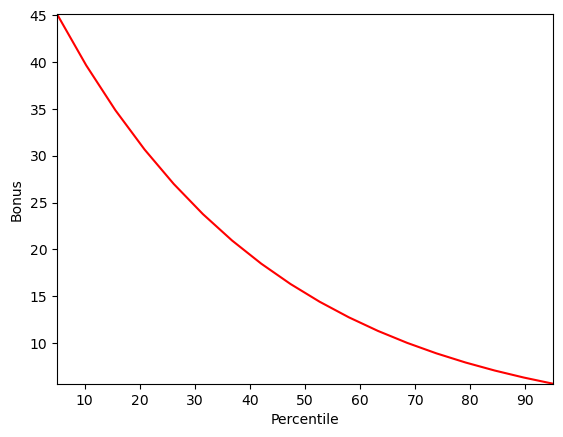

In [43]:
#This is just to show you the bonus curve. This is NOT part of the question.
import numpy as np
import sys
import matplotlib.pyplot as plt

a = 50
b = 0.025
c = 1 
x = np.linspace(5, 95, 18, endpoint = True)
y = (a * np.exp(-b*x)) + c

#print(list(zip(x,y)))
plt.plot(x, y, '-r')

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('Percentile')
plt.ylabel('Bonus')

plt.show()

while False: #set this to True to see your bonus points based on your hypothetical percentile
    try:
        x_in=float(input('percentile:'))
        bonus_out=np.round((a * np.exp(-b*x_in)) + c)
        print('At {:0.0f} percentile, you will get {:0.1f} bonus points'.format(x_in,bonus_out))
    except:
        print("Exiting")
        sys.exit(1)

In [44]:
#Your code here. Feel free to make as many cells as needed